In [17]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from urllib.request import urlretrieve

%matplotlib inline


In [18]:
medical_data_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'

In [19]:
urlretrieve(medical_data_url, 'medical.csv')

('medical.csv', <http.client.HTTPMessage at 0x11e9d2c40>)

In [20]:
medical_df = pd.read_csv('medical.csv')

In [21]:
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [22]:
len(medical_df.columns) # our dataset has 7 columns

7

In [23]:
medical_df.shape # our dataset has 1338 rows and 7 columns

(1338, 7)

our dataset contains 1338 rows and 7 columns. Each row of the dataset contains info about each customer.
Our main objective here is to estimate the value in the 'charges' column using the values in the other columns. If we can do so for the historical data, then we should be able to estimate charges for new customers too..simply by asking for information like their age, sex, BMI, no.of children, Smoking habits and region.

In [24]:
# lets check the datatypes of the columns
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [25]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [26]:
# setting the style of the plots
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (12, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### Age
Age is a numeric column. The minimum age in the dataset is 18 and the maximum age is 64. Thus, we can visualize the distribution of age using histogram with 47 bins (each for each year) and a boxplot. we'll use plotly to make the chart interactive, but you can create similar charts using seaborn

In [27]:
medical_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [28]:
fig = px.histogram(medical_df,
                   x = 'age',
                   marginal = 'box',
                   nbins = 47,
                   title = 'Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

The distribution of ages in the dataset is almost uniform, with 20-30 customers at every age, except for the ages of 18 and 19, which seem to have over twice as many customers as other ages. The uniform distribution might arise from the fact that there isn't a big variation in the number of people of any given age (between 18 and 64) in the USA

### Body Mass Index
Let's look at the distribution of BMI(Body Mass Index) of customers, using a histogram and box plot

In [29]:
medical_df.bmi.describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

In [30]:
fig = px.histogram(medical_df,
                   x = 'bmi',
                   marginal = 'box',
                   color_discrete_sequence=['red'],
                   title = 'Distribution of Body Mass Index (BMI)')
fig.update_layout(bargap=0.1)
fig.show()

The measurements of body mass index seem to form a Gaussian distribution centered around the value 30, with a few outliers towards the right.

In [31]:
# can you explain why the distribution of ages forms a uniform distribution while the distribution of BMI forms a Gaussian distribution?


### Charges
Let's visualize the distributon of 'charges' i.e the annual medical charges for customers. This is the column we're trying to predict. Let's also use the categorical column 'smoker' to distinguish the charges for smokers and non-smokers.

In [32]:
fig = px.histogram(medical_df,
                   x='charges',
                   marginal='box',
                   color='smoker',
                   color_discrete_sequence=['red', 'blue'],
                   title='Distribution of Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

we can make the following observations from the above graph:
- for most customers, the annual medical charges are under $10,000. ONly a small fraction of customer have higher medical expenses, possibly due to accidents, major illnesses and genetic diseases. The distribution follows a "power law"
- there is a significant difference in medical expenses between smokers and non-smokers. While the median for non-smokers is $7,300, the median for smokers is close to $35,000.

## Execise

visualize the distribution of medical charges in connection with other factors such as sex and region. What do you observe?

### Smoker vs Non-Smoker
let's visualize the distribution of the smoker column (containing yes and no values) using a histogram.

In [33]:
medical_df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [34]:
px.histogram(medical_df,
             x='smoker',
             color='sex',
             title='Distribution of Smokers and Non-Smokers',)

it appears that 20% of the customers have reported that they smoke. can you verify whether this matches the national average, assuming the data was collected in 2010? we can also see that smoking appears a more common habit among males. can you verify this?

### Exercise
visualize the distribution of the 'sex', 'region' and 'children' columns and report your observations.

Having looked at individual columns, we can now visualize the relationship between 'charges' (the value we wish to predict) and other columns.

### Age and Charges
let's visualize the relationship between 'age' and 'charges' using a scatter plot. Each point in the scatter plot represents one customer. We'll also use values in the 'smoker' column to color the points.

In [36]:
fig = px.scatter(medical_df,
                 x = 'age',
                 y = 'charges',
                 color='smoker',
                 opacity=0.7,
                 hover_data=['sex'],
                 title='Relationship between Age and Annual Medical Charges')
fig.update_traces(marker_size=7)
fig.show()

we can make the following observations from the above chart:
- The general trend seems to be that medical charges increase with age as we might expect. 
However, there is significant variation at every age, and it is clear that age alone cannot be used to accurately determine medical charges.
- we can see three 'clusters' of points, each of which seems to form a line with an increasing slope:
    1. the first and the largest cluster consists of primary of presumably 'healthy non-smokers' who have relatively low medical charges compared to others.
    2. the second cluster contains a mix of smokers and non-smokers. it is possible that these are actually two distinct but overlapping clusters: 'non-smokers with medical issues' and 'smokers without major medical issues'.
    3. the final cluster consists exclusively of smokers, presumably smokers with major medical issuses that are possibly related to or worsened by smoking.


### Exercise
what other inferences can you draw from the above chart?

### BMI and Charges
let's visualize the relationship between 'BMI' and 'charges' using a scatter plot. Each point in the scatter plot represents one customer. we'll also use values in the 'smoker' column to colour the points.

In [38]:
fig =px.scatter(medical_df,
                x = 'bmi',
                y = 'charges',
                color = 'smoker',
                opacity=0.8,
                hover_data=['sex'],
                title='BMI vs Charges')
fig.update_traces(marker_size = 6)
fig.show()

it appears that for non-smokers, an increase in BMI doesn't seem to be related to an increase in medical charges. However, medical charges seem to be significantly higher for smokers with a BMI greater than 30.

What other insights can we gather from the above graph?

### Exercise
create some more graphs to visualize how the 'charges' column is related to other columns ('children', 'sex', 'region' and 'smoker'). summarize the insights gathered from these graphs.
Hint: use violin plots(px.violin) and barplots (sns.barplot)


## CORRELATION
As you can tell from the analysis, the values in some columns are more closely related to the values in 'charges' compared to other columns. e.g 'age' and 'charges' seem to grow together, whereas 'bmi' and 'charges' don't.
This relationship is often expressed numerically using a measure called the Correlation coefficient, which can be computed using the .corr method of pandas series.


In [ ]:
medical_df.charges.corr(medical_df.age)


np.float64(0.29900819333064754)

In [40]:
medical_df.charges.corr(medical_df.bmi)

np.float64(0.19834096883362884)

In [41]:
medical_df.charges.corr(medical_df.children)

np.float64(0.0679982268479048)

In [43]:
# To compute the correlation for categorical columns, they must first be converted to numeric columns.
medical_df.smoker

0       yes
1        no
2        no
3        no
4        no
       ... 
1333     no
1334     no
1335     no
1336     no
1337    yes
Name: smoker, Length: 1338, dtype: object

In [ ]:
smoker_values = {'no' : 0, 'yes' : 1}
smoker_numeric = medical_df.smoker.map(smoker_values) # read more about map here: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.map.html

smoker_numeric

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64

In [46]:
print(medical_df.charges.corr(smoker_numeric))

0.7872514304984772





Here's how correlation coefficients can be interpreted ([source](https://statisticsbyjim.com/basics/correlations)):

* **Strength**: The greater the absolute value of the correlation coefficient, the stronger the relationship.

    * The extreme values of -1 and 1 indicate a perfectly linear relationship where a change in one variable is accompanied by a perfectly consistent change in the other. For these relationships, all of the data points fall on a line. In practice, you won’t see either type of perfect relationship.

    * A coefficient of zero represents no linear relationship. As one variable increases, there is no tendency in the other variable to either increase or decrease.
    
    * When the value is in-between 0 and +1/-1, there is a relationship, but the points don’t all fall on a line. As r approaches -1 or 1, the strength of the relationship increases and the data points tend to fall closer to a line.


* **Direction**: The sign of the correlation coefficient represents the direction of the relationship.

    * Positive coefficients indicate that when the value of one variable increases, the value of the other variable also tends to increase. Positive relationships produce an upward slope on a scatterplot.
    
    * Negative coefficients represent cases when the value of one variable increases, the value of the other variable tends to decrease. Negative relationships produce a downward slope.

Here's the same relationship expressed visually ([source](https://www.cuemath.com/data/how-to-calculate-correlation-coefficient/)):

<img src="https://i.imgur.com/3XUpDlw.png" width="360">

The correlation coefficient has the following formula:

<img src="https://i.imgur.com/unapugP.png" width="360">

You can learn more about the mathematical definition and geometric interpretation of correlation here: https://www.youtube.com/watch?v=xZ_z8KWkhXE

Pandas dataframes also provide a `.corr` method to compute the correlation coefficients between all pairs of numeric columns.

In [49]:
# correlation matrix for all numeric columns using the .corr method 
medical_df.select_dtypes(include=[np.number]).corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


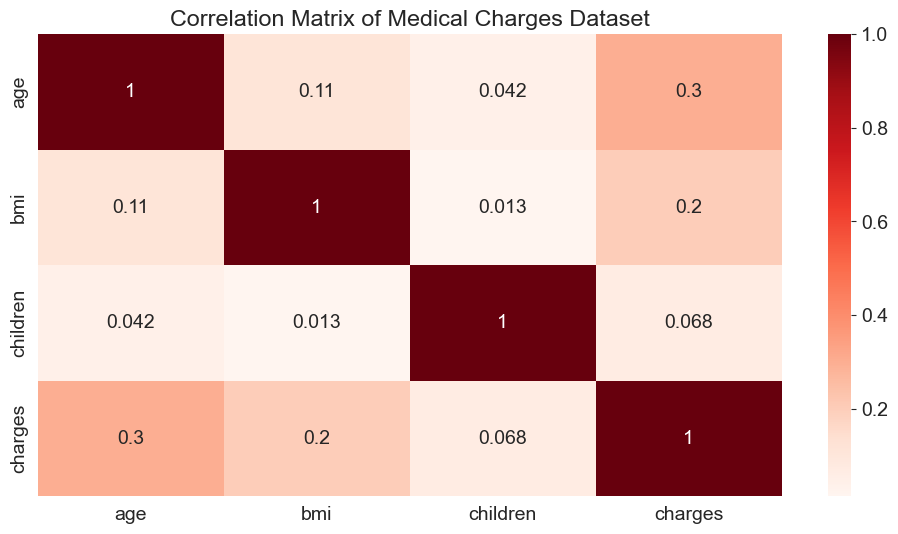

In [52]:
# visualizing the correlation matrix using seaborn
sns.heatmap(medical_df.select_dtypes(include=[np.number]).corr(), 
            cmap='Reds',
            annot=True)
plt.title('Correlation Matrix of Medical Charges Dataset')
plt.show()


**Correlation vs causation fallacy:** Note that a high correlation cannot be used to interpret a cause-effect relationship between features. Two features $X$ and $Y$ can be correlated if $X$ causes $Y$ or if $Y$ causes $X$, or if both are caused independently by some other factor $Z$, and the correlation will no longer hold true if one of the cause-effect relationships is broken. It's also possible that $X$ are $Y$ simply appear to be correlated because the sample is too small. 

While this may seem obvious, computers can't differentiate between correlation and causation, and decisions based on automated system can often have major consequences on society, so it's important to study why automated systems lead to a given result. Determining cause-effect relationships requires human insight.

### Linear Regression using a single feature
We now know that the "smoker" and "age" columns have the strongest correlation with "charges". Let's try to find a way of estimating the value of "charges" using the value of "age" for non-smokers. First, let's create a data frame containing just the data for non-smokers.

In [53]:
non_smokers = medical_df[medical_df.smoker == 'no']

<Axes: title={'center': 'Relationship between Age and Charges for Non-Smokers'}, xlabel='age', ylabel='charges'>

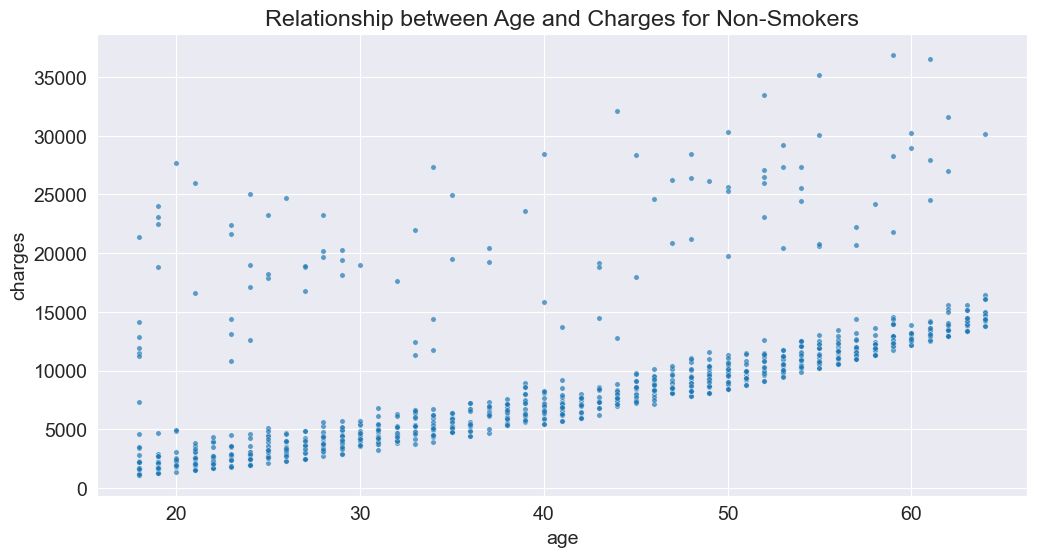

In [54]:
# let's visualize the relationship between age and charges for non-smokers
plt.title('Relationship between Age and Charges for Non-Smokers')
sns.scatterplot(data=non_smokers, x='age', y='charges', alpha=0.7, s=15)

Apart from a few exceptions, the points seem to form a line. We'll try and "fit" a line using this points, and use the line to predict charges for a given age. A line on the X&Y coordinates has the following formula:

$y = wx + b$

The line is characterized two numbers: $w$ (called "slope") and $b$ (called "intercept"). 

### Model

In the above case, the x axis shows "age" and the y axis shows "charges". Thus, we're assume the following relationship between the two:

$charges = w \times age + b$

We'll try determine $w$ and $b$ for the line that best fits the data. 

* This technique is called _linear regression_, and we call the above equation a _linear regression model_, because it models the relationship between "age" and "charges" as a straight line. 

* The numbers $w$ and $b$ are called the _parameters_ or _weights_ of the model.

* The values in the "age" column of the dataset are called the _inputs_ to the model and the values in the charges column are called "targets". 

Let define a helper function `estimate_charges`, to compute $charges$, given $age$, $w$ and $b$.

In [57]:
def estimate_charges(age, w, b):
    """
    Estimate the annual medical charges for a non-smoker based on their age.
    
    Parameters:
    age (float): The age of the non-smoker.
    w (float): The weight (slope) of the linear regression line.
    b (float): The bias (intercept) of the linear regression line.
    
    Returns:
    float: Estimated annual medical charges.
    """
    return w * age + b

- The estimate_charges function is our very first model.
- Let's guess the values for w and b and use them to estimate the value for charges.

In [58]:
w = 50
b = 100

In [59]:
estimate_charges(30, w, b)

1600

In [60]:
ages = non_smokers.age
ages

1       18
2       28
3       33
4       32
5       31
        ..
1332    52
1333    50
1334    18
1335    18
1336    21
Name: age, Length: 1064, dtype: int64

In [61]:
estimated_charges = estimate_charges(ages, w, b)
estimated_charges

1       1000
2       1500
3       1750
4       1700
5       1650
        ... 
1332    2700
1333    2600
1334    1000
1335    1000
1336    1150
Name: age, Length: 1064, dtype: int64

In [62]:
non_smokers.charges

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

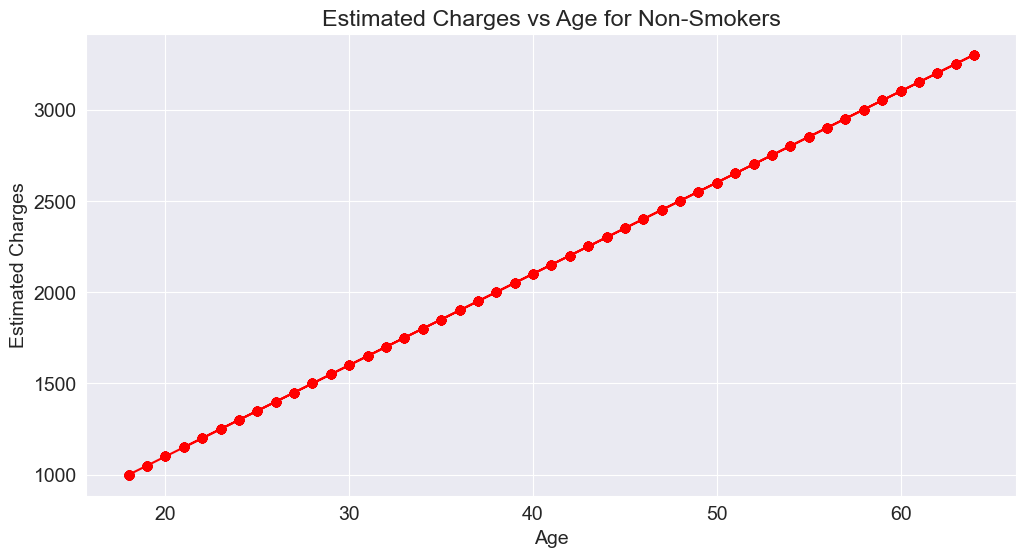

In [67]:
plt.plot(ages, estimated_charges, color='red', marker='o')
plt.xlabel('Age')
plt.ylabel('Estimated Charges')
plt.title('Estimated Charges vs Age for Non-Smokers')
plt.show()

As expected, the points lie on a straight line.
we can overlay this line on the actual data, so see how well our model fits the data.

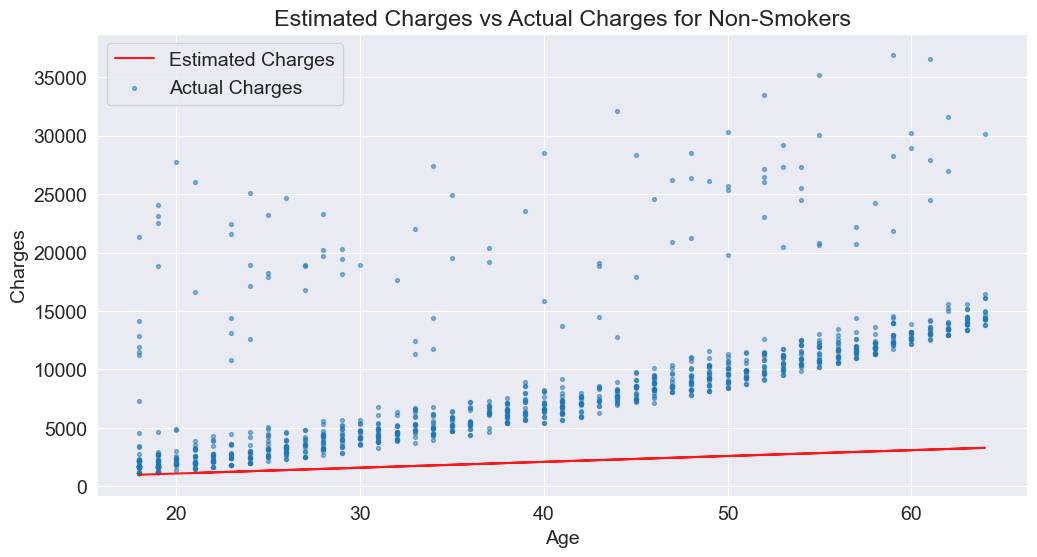

In [69]:
target = non_smokers.charges
plt.plot(ages, estimated_charges, 'r', alpha=0.9)
plt.scatter(ages, target, s=8, alpha=0.5)

plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Estimated Charges vs Actual Charges for Non-Smokers')
plt.legend(['Estimated Charges', 'Actual Charges'])
plt.show()

our estimates are quite poor and the line does not 'fit' the data. however, we can try different values of w and b to move the line around. let's define a helper function try_parameters which takes w and b as inputs and creates the above plot.

In [70]:
def try_parameters(w, b):
    """
    Plot the estimated charges against actual charges for non-smokers using given parameters w and b.
    
    Parameters:
    w (float): The weight (slope) of the linear regression line.
    b (float): The bias (intercept) of the linear regression line.
    """
    estimated_charges = estimate_charges(ages, w, b)
    
    plt.plot(ages, estimated_charges, 'r', alpha=0.9)
    plt.scatter(ages, target, s=8, alpha=0.5)
    
    plt.xlabel('Age')
    plt.ylabel('Charges')
    plt.title(f'Estimated Charges vs Actual Charges for Non-Smokers (w={w}, b={b})')
    plt.legend(['Estimated Charges', 'Actual Charges'])
    plt.show()

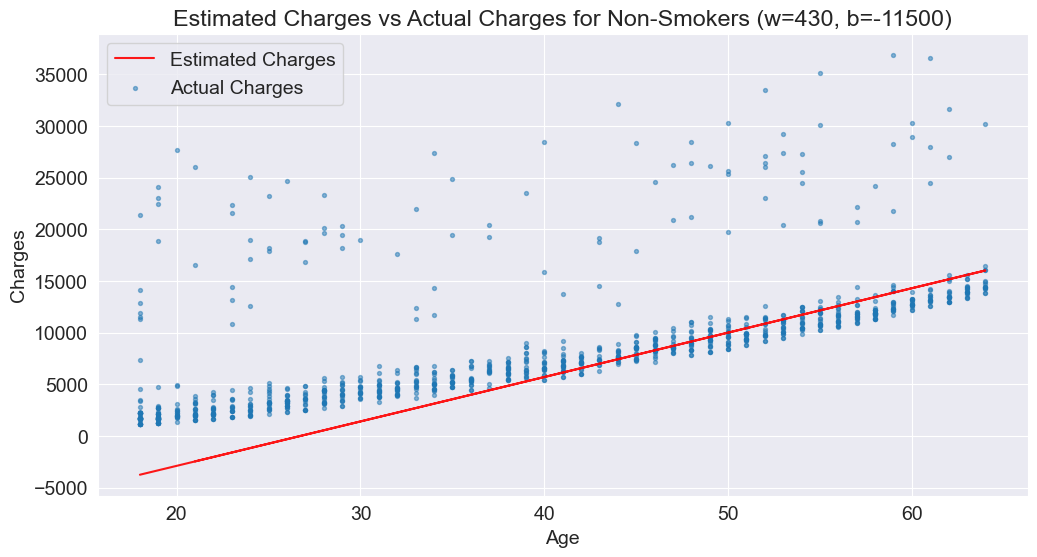

In [94]:
try_parameters(430, -11500)


### testing